# 独立同一分布（i.i.d: independently and identically distributed）

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import stats

import warnings

warnings.filterwarnings('ignore')

np.random.seed(0)
%precision 3

'%.3f'

In [23]:
# 離散型確率変数に対するいくつかの関数を用意
linestyles = ['-', '--', ':', '-.']


def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])


def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])


def f_X(x):
    return np.sum(f_XY(x, y_k) for y_k in y_set)


def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 独立性（independence）

### 独立性の定義
- 確率変数の独立性とは、２つ以上の確率が互いに影響を及ばさないことを表す概念
- 確率変数が独立なとき、同時確率は周辺確率の積で書くことができる

### 独立性と無相関性
- 独立性も無相関性も２つの確率変数の無関係を表す性質
- 無相関性よりも独立性のほうが強い概念になる。
    - 複数の確率変数が独立な時にそれぞれの確率変数は無相関になる
    - 複数の確率変数が無相関な時にそれぞれの確率変数が必ずしも独立である、とは限らない。

In [24]:
# Python で独立と無相関性について確かめる
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])


def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0


XY = [x_set, y_set, f_XY]

In [25]:
# 共分散を確かめる
Cov(XY)

-0.000

共分散が０になり、無相関であることを確認。
この例に限らず、２つの確率変数が独立であれば必ず無相関になる。

In [26]:
# 無相関なのに独立ではない例
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])


def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0


XY = [x_set, y_set, f_XY]

In [27]:
Cov(XY)

0.000

共分散が０になったので、確率変数 X と Y は無相関であることが確認とれた。
確率変数 X と Y が独立か確かめる。
独立の関係が成り立つ時に同時関数は周辺確率の積が成り立つのでそれぞれの式に０をx, y に代入して同じ値になるか確かめる

In [28]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.111, 0.333)

式が成り立っていないため、X と Y は独立ではない。
これらから、無相関であっても独立性が成り立たない場合があることが確認とれる。

## 和の分布
互いに独立に同一の確率分布に従う確率変数 X1, X2,..., Xn の和が従う確率分布と考える。
和の分布を理解することで、それを n で割った標本平均の分布も理解しやすくなる

- 和の分布の期待値はそれぞれの確率変数の期待値の和で計算できる。
- それぞれの確率変数が独立ならば分散もそれぞれの確率変数の分散の和で計算できる。

### 正規分布の和の分布

In [29]:
rv1 = stats.norm(1, np.sqrt(2))  # N(1, 2) の正規分布
rv2 = stats.norm(2, np.sqrt(3))  # N(2, 3) の正規分布

sample_size = int(1e6)  # 標本の大きさ

# それぞれの正規分布から無作為に抽出した1,000,000個の値
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.003, 4.996)

公式で求めた倫理値に近い値がでた。

#### 再生性
- 同じ確率分布に従う２つの独立な確率変数に対して、その和もまた同じ確率分布に性質こと
- 正規分布は再生性がある
- 再生性はすべての確率分布がもつ性質ではないことに注意する

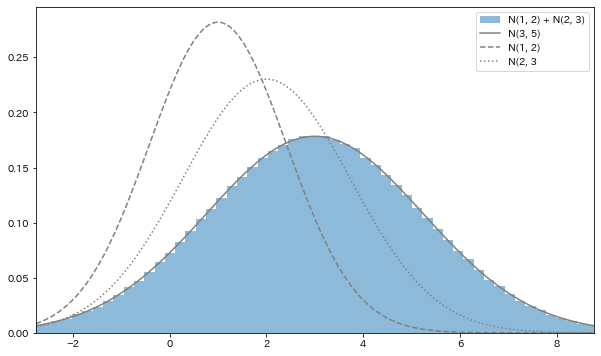

In [30]:
# X+Y から無作為抽出した標本 Data の Histogram と N(3,5)の密度関数を一緒に図示してみる
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True, alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

Histogram と密度関数がきれいに一致し、X+Y ~ N(3, 5)の確認がとれた。
n 個の正規分布の和になっても再生性から正規分布となる。